In [38]:
import pandas as pd
import numpy
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np



## Nhận xét qua về bộ dữ liệu

- Là người trực tiếp làm sạch dữ liệu minh nhận thấy ở 90% các sản phầm ở mỗi mức giá ứng với mỗi sản phẩm data chỉ cho **8 người** đây chỉ là những người đại diện tiêu biểu.

- Tuy nhiên rating của bộ dữ liệu lại là mức trung bình của int(	rating_count / rating) người đầu tiên mua mặt hàng này trên hệ thống).

- Mặc dù dữ liệu BTC cho được chia nhiều dòng ứng với mỗi đợt giảm giá nhưng thông số của tất cả đợt giảm giá vẫn giữ nguyên.

- Ở phần lớn mặt hàng mặc dù đã được giảm giá nhưng các con số vẫn bị lặp lại ở 8 người tiêu biểu xuất, rating và rating count giống với product ID xuất hiện lần đầu tiên trên bộ dữ liệu khi xét từ trên xuống dưới.


-> Chưa cần lập biểu đỗ cũng dễ dàng nhận thấy, các biểu đồ sẽ có bị sự lặp lại nhất định

- Với mỗi đợt giảm giá có mặt hàng nào có lượng người mua nhiều hơn không? -> Dù bạn có giảm giá thì lượng người mua và đánh giá sản phầm vẫn như bạn có tăng giá đi nữa :)))
- ........


Rõ ràng chúng ta cần duyệt qua các đánh giá trên web mới cho thể đưa ra những thông tin chính xác nhất.

Amazon có lẽ đã có 1 hệ thống tự động để làm những điều này lên họ mới đưa Link vào data để các nhà dữ liệu bên họ xử lý.


Với nhóm sinh viên trong 2 tuần thì để hoan thành việc này xây dựng mô hình các thứ gần như là k thể



In [40]:
df = pd.read_csv("/content/amazon-cleaned.csv")


In [39]:
v = []
for i in range(len(data)):
  v.append(data["product_id"][i])
print("Số sản phẩm khác nhau là", len(set(v)))

Số sản phẩm khác nhau là 1350


# đếm xem mỗi mặt hàng có bao nhiều lần giảm giá và xem khi được giảm nhá nhiều thì rating tăng hay giảm

(Mỗi quản hệ giữa số lần giảm giá và rating)

In [41]:
v = set(data["product_id"])
v = list(v)

printt = []

for x in v:
    licount = []
    lirating = []
    for i in range(len(data)):
        if data["product_id"][i] == x:
            licount.append(data["discounted_price"][i])
            lirating.append(data["rating"][i])

    h = [x, len(set(licount)), len(set(lirating))]
    printt.append(h)

for i in range(10):
    print(printt[i])


['B08KRMK9LZ', 1, 1]
['B0B15GSPQW', 1, 1]
['B08WKFSN84', 1, 1]
['B09MT6XSFW', 1, 1]
['B0B4F2XCK3', 1, 1]
['B095RTJH1M', 1, 1]
['B08L4SBJRY', 1, 1]
['B08S74GTBT', 1, 1]
['B088Z1YWBC', 1, 1]
['B00AXHBBXU', 1, 1]


In [42]:
ans = 0
for i in range(len(printt)):
    if printt[i][1] > 1:
        print(printt[i])
        ans += 1
        if ans == 10:
          break

['B0B5LVS732', 2, 1]
['B0B5B6PQCT', 2, 1]
['B09MT84WV5', 2, 1]


Nhận xét: Chỉ có 3 sản phẩm có sự thay đổi về mức giảm giá, nhưng dù có thay đổi mức giảm giá thì rating và lượng đánh giá vẫn không đổi



## Số lượng userid tổng cộng của mỗi mặt hàng



In [43]:
v = set(data["product_id"])
v = list(v)

printt = []

for x in v:
    licount = []
    lirating = []
    for i in range(len(data)):
        if data["product_id"][i] == x:
            licount.append(data["user_id"][i])

    h = [len(set(licount)), x]
    printt.append(h)



In [44]:
printt.sort(reverse = True)

print("10 mặt hàng có lượng user id nhiều nhất là")
for i in range(10):
    print(printt[i][1], printt[i][0])
print("10 mặt hàng có lượng user id ít nhất là")
for i in range(len(printt) - 10, len(printt)):
    print(printt[i][1], printt[i][0])

ans = 0
for i in range(len(printt)):
    if printt[i][0] == 8:
        ans += 1

print("Số lượng mặt hàng có số lượng user id = 8 trên tống số ", len(printt), " mặt hàng là: ", ans)

10 mặt hàng có lượng user id nhiều nhất là
B0BMXMLSMM 9
B09ZQK9X8G 9
B09YV4MW2T 9
B09V12K8NT 9
B09NVPSCQT 9
B09MT84WV5 9
B0994GFWBH 9
B097R25DP7 9
B08WRBG3XW 9
B0BQ3K23Y1 8
10 mặt hàng có lượng user id ít nhất là
B07WDKLDRX 2
B0BQRJ3C47 1
B0B94JPY2N 1
B0B3X2BY3M 1
B0B3JSWG81 1
B09XJ1LM7R 1
B09VH568H7 1
B08KHM9VBJ 1
B08GJNM9N7 1
B07JPX9CR7 1
Số lượng mặt hàng có số lượng user id = 8 trên tống số  1350  mặt hàng là:  1280


Chỉ có 70 mặt hàng có số lượng user id khác 8.

# category



category nào có nhiều người và ít người mua nhất

In [52]:
li = [0] * (len(data))
for i in range(len(data)):
  li[int(data["category"][i])]  += 1
li2 = []
for i in range(len(li)):
  if li[i] > 0:
    li2.append([li[i], i])
li2.sort()

print("10 category nhieu nguoi mua nhat ")
for i in range(10):
  print(li2[i])
print("10 category it nguoi mua nhat ")

for i in range(len(li2) - 10, len(li2)):
  print(li2[i])

10 category nhieu nguoi mua nhat 
[1, 119]
[4, 89]
[4, 113]
[4, 189]
[8, 2]
[8, 4]
[8, 7]
[8, 10]
[8, 11]
[8, 16]
10 category it nguoi mua nhat 
[185, 3]
[185, 165]
[192, 47]
[216, 75]
[373, 128]
[400, 77]
[490, 5]
[505, 15]
[596, 160]
[1826, 176]


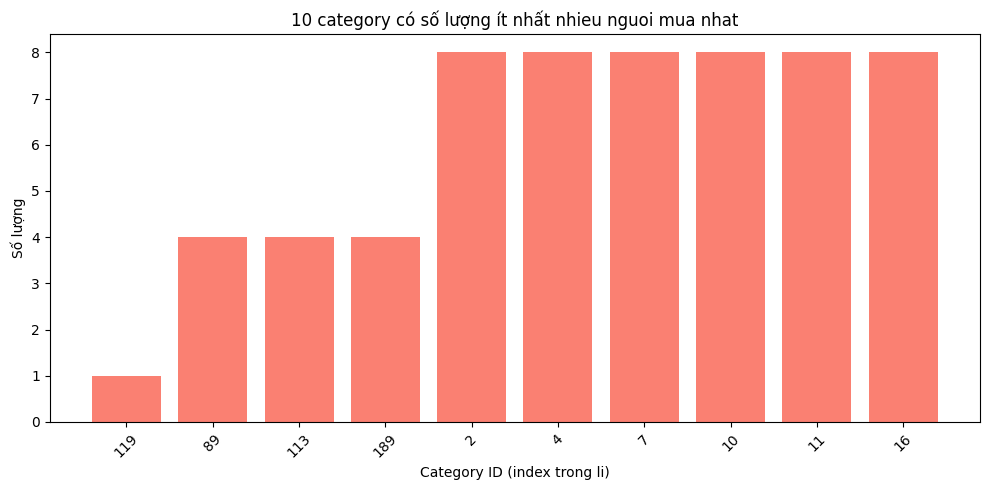

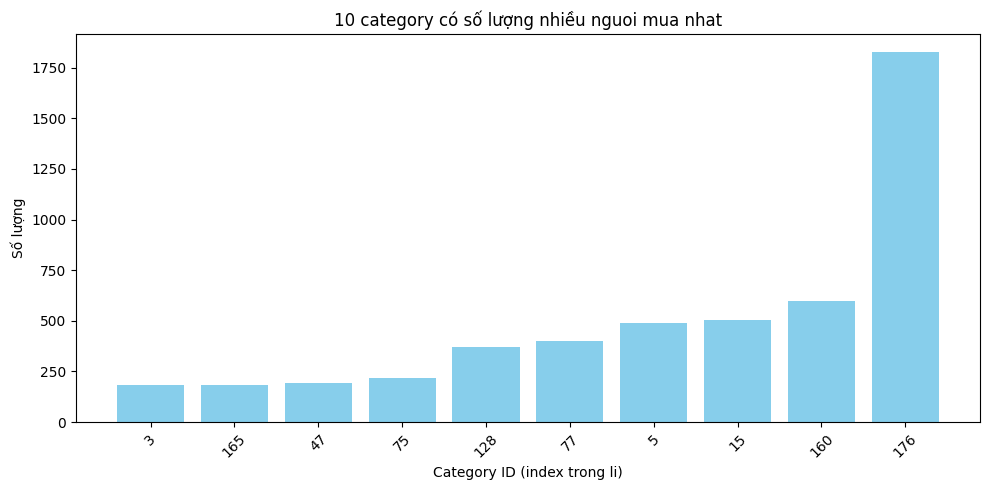

In [50]:
import matplotlib.pyplot as plt

# Lấy 10 category ít nhất và nhiều nhất
bottom_10 = li2[:10]
top_10 = li2[-10:]

# Dữ liệu cho bottom 10
bottom_values = [item[0] for item in bottom_10]
bottom_labels = [str(item[1]) for item in bottom_10]

# Dữ liệu cho top 10
top_values = [item[0] for item in top_10]
top_labels = [str(item[1]) for item in top_10]

# Vẽ Bottom 10
plt.figure(figsize=(10, 5))
plt.bar(bottom_labels, bottom_values, color='salmon')
plt.title("10 category có số lượng ít nhất nhieu nguoi mua nhat")
plt.xlabel("Category ID (index trong li)")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Vẽ Top 10
plt.figure(figsize=(10, 5))
plt.bar(top_labels, top_values, color='skyblue')
plt.title("10 category có số lượng nhiều nguoi mua nhat")
plt.xlabel("Category ID (index trong li)")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Phân tích phân bố của đánh giá và số lượng đánh giá

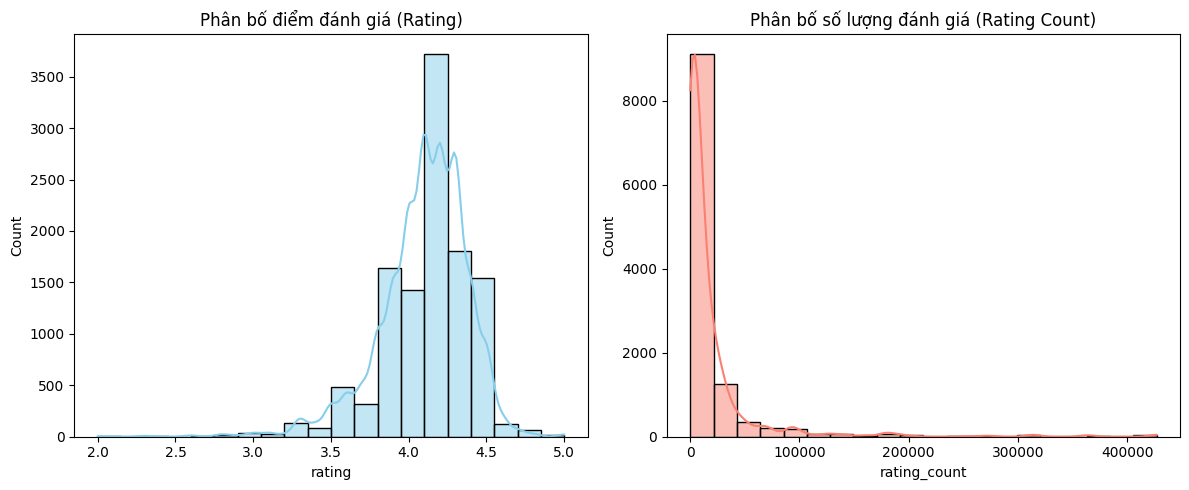

(np.float64(4.098112877861261),
 product_id
 B07KSMBL2H    6831560.0
 B014I8SSD0    3415784.0
 B014I8SX4Y    3415784.0
 B01DEWVZ2C    3081416.0
 B07GPXXNNG    2909704.0
 Name: rating_count, dtype: float64)

In [4]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['rating'], bins=20, kde=True, color='skyblue')
plt.title('Phân bố điểm đánh giá (Rating)')

# Vẽ histogram cho rating_count
plt.subplot(1, 2, 2)
sns.histplot(df['rating_count'], bins=20, kde=True, color='salmon')
plt.title('Phân bố số lượng đánh giá (Rating Count)')
plt.tight_layout()
plt.show()

# Thống kê tổng hợp
mean_rating = df['rating'].mean()
top_products = df.groupby('product_id')['rating_count'].sum().sort_values(ascending=False).head(5)
mean_rating, top_products

Biểu đồ histogram cho thấy rating phân bố lệch trái nhẹ (đa phần đánh giá cao).

Điểm đánh giá trung bình: 4.10

Top 5 sản phẩm có số lượng đánh giá cao nhất:

B07KSMBL2H	6,831,560

B014I8SX4Y	3,415,784

B014I8SSD0	3,415,784

B01DEWVZ2C	3,081,416

B07GPXXNNG	2,909,704

# Xác định sản phẩm phổ biến nhất và ít phổ biến nhất



<ipython-input-5-5a081bb47795>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_volume.values, y=rating_volume.index, palette='viridis')


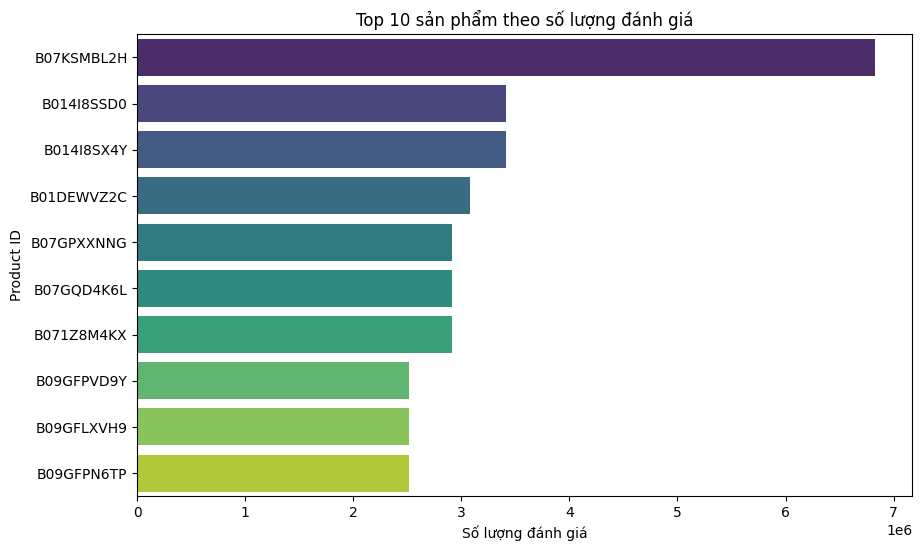

In [5]:
rating_volume = df.groupby('product_id')['rating_count'].sum().sort_values(ascending=False).head(10)

# Vẽ biểu đồ thanh
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_volume.values, y=rating_volume.index, palette='viridis')
plt.xlabel("Số lượng đánh giá")
plt.ylabel("Product ID")
plt.title("Top 10 sản phẩm theo số lượng đánh giá")
plt.show()


# Phân tích mối quan hệ giữa giá, giảm giá và đánh giá

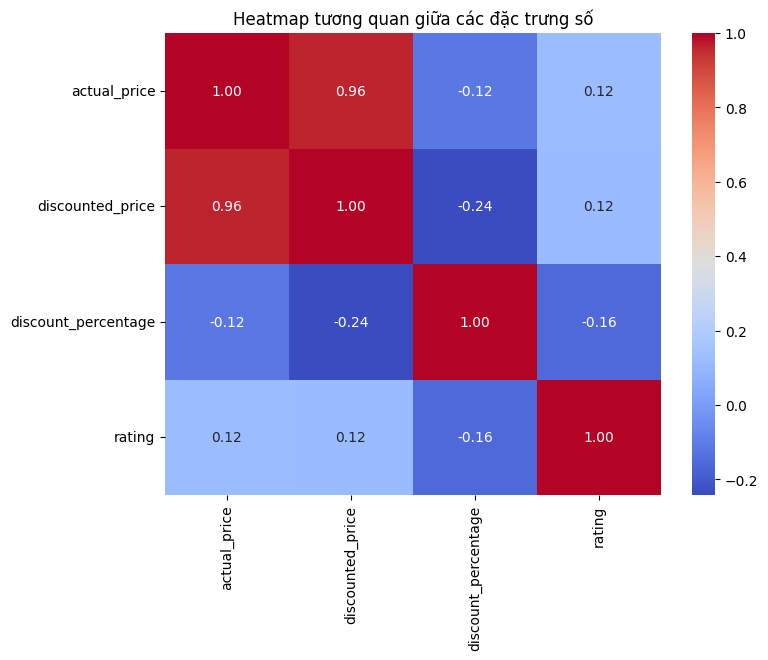

In [6]:
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

plt.figure(figsize=(8, 6))
numerical_cols = ['actual_price', 'discounted_price', 'discount_percentage', 'rating']
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap tương quan giữa các đặc trưng số")
plt.show()


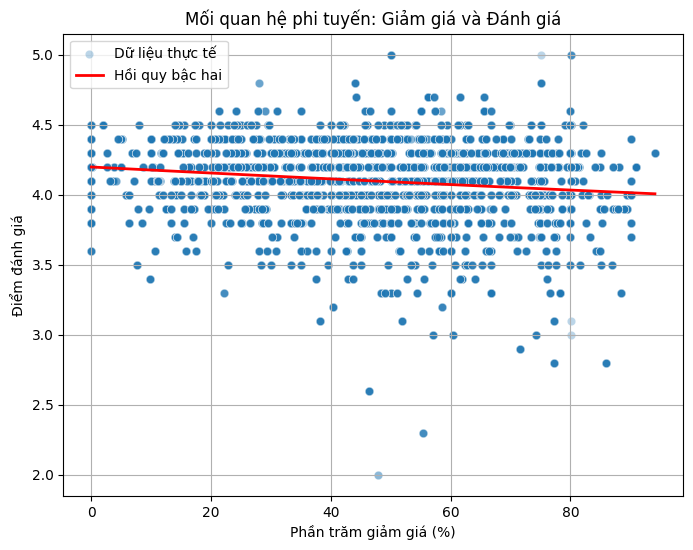

In [12]:

filtered_df = df[['discount_percentage', 'rating']].dropna()

X = filtered_df[['discount_percentage']].values
y = filtered_df['rating'].values

# Khởi tạo và huấn luyện mô hình hồi quy bậc hai
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Tạo dữ liệu cho đường cong dự đoán
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred = model.predict(x_range_poly)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_df['discount_percentage'], y=filtered_df['rating'], alpha=0.3, label='Dữ liệu thực tế')
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Hồi quy bậc hai')
plt.xlabel('Phần trăm giảm giá (%)')
plt.ylabel('Điểm đánh giá')
plt.title('Mối quan hệ phi tuyến: Giảm giá và Đánh giá')
plt.legend()
plt.grid(True)
plt.show()

Giảm giá cao → Đánh giá thấp	Sản phẩm đang "xả hàng", lỗi mốt, chất lượng không còn tốt

Khách kỳ vọng cao hơn khi thấy giảm mạnh → dễ thất vọng

Sản phẩm giá rẻ thường thu hút nhiều người dùng không hài lòng dễ phản hồi tiêu cực

In [13]:
df[['discount_percentage', 'rating']].corr()


,discount_percentage,rating
discount_percentage,1.00000,-0.15645
rating,-0.15645,1.00000


Nhưng độ mạnh mối quan hệ là yếu (vì |-0.156| < 0.2).

Nghĩa là: xu hướng này có tồn tại, nhưng không đủ mạnh để dự đoán chính xác.